# Whatsapp Analyzer

This jupyter notebook is used to a analyze whatsapp chat. Just for fun ;)

## Import Libraries

In [1]:
import matplotlib

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from parse import *
import pandas as pd; pd.set_option('max_columns', 6)

## Define an Avatar Class

In [2]:
class Avatar:
  def __init__(self, name):
    self.name = name
    self.dictionary = {}
    self.nb_chat_sent = 0;
    self.key_words = {}

  def myfunc(self):
    print("Hello my name is " + self.name)
    
  def printDict(self):
    print(self.name + "'s dictionary: ")
    print(self.dictionary)
    
  def printNbOfMessage(self):
    print("Number of message sent by " + self.name + " : " + str(self.nb_chat_sent))

## Define Functions

In [3]:
def build_dict_of_word(message, dictionary):
    parsed_message = message.split(" ")

    for word in parsed_message:
        if (word == 'unu' or word == 'nuuuu' or word == 'unuuuu' or word == 'unuuuuu'):
            word = 'nu'
        if (word == 'oiii' or word == 'oii'):
            word = 'oi'

        if (word not in list_of_neglected_words):
            build_dict(word, dictionary)
                
def build_dict(keys, dictionary):
    if(keys not in dictionary.keys()):
        dictionary[keys] = 1
    else:
        dictionary[keys] += 1
    

def by_hour_list_day(date, list_of_date, keys, dictionary):
    #if date is in list of date
    #add counter
    #else append the value list
    #add counter
    
    date_counter
    nb_of_chat_per_day = 0;
    
    if(date not in list_of_date):
        dictionary[keys] 
    if(keys not in dictionary.keys()):
        dictionary[keys] = 1
    else:
        dictionary[keys] += 1
        
def sort_dict_by_key(dictionary):
    sorted_dict = {}
    for i in sorted (dictionary): 
        sorted_dict[i] = dictionary[i]
    
    return sorted_dict

def sort_dict_by_value(dictionary):
    return sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

## Load Messages from Text File

In [4]:
f = open('ChatWithSry.txt', 'r', encoding="utf8")
content = f.read()
#print(content)
f.close()

## Initialize Variables

In [5]:
#init name
my_name = "Fazlur Rahman"
partner_name = "Sry Handini Puteri"

#instantiate person
person1 = Avatar(my_name)
person2 = Avatar(partner_name)

#initialize empty list and string
chats = []
chat = ""

#init list of neglected words
list_of_neglected_words = ['<media', 'omitted>', 'di', 'yang', 'ba', 'nya', 'ini', 'ke', 'juga', 'ada', 'lagi']

#init counter
nb_of_days = 0
nb_sent_by_day = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0} 

#init dict, nb of chat per day
list_of_date = []
dict_nb_of_chat_per_day = {}
dict_nb_of_chat_by_hour = {}

dict_per_day_per_hour = {}
dict_nb_of_chat_by_hour_per_day = {}

## Extract Data

In [6]:
for i in range (len(content)):
    chat = chat + content[i]
    if (content[i] == "\n"):
        chats.append(chat)

        r = parse("{}, {} - {}: {}", chat)
        
        if (r is not None):
            date = r[0]
            month, day, year = r[0].split("/")
            hour_min = r[1]
            sender = r[2]
            message = r[3].lower()

            if(year=="20"):
                print(date)
                if (date not in dict_nb_of_chat_per_day.keys()):
                    nb_of_days += 1

                build_dict(date, dict_nb_of_chat_per_day);

                hour = hour_min.split(":")[0]
                min = hour_min.split(":")[1]

                build_dict(hour, dict_nb_of_chat_by_hour)
                build_dict(hour, dict_nb_of_chat_by_hour_per_day)

                if (date not in dict_per_day_per_hour.keys()):
                    dict_per_day_per_hour[date] = dict_nb_of_chat_by_hour_per_day
                    dict_nb_of_chat_by_hour_per_day = {}


                if (sender == person1.name):
                    person1.nb_chat_sent += 1
                    build_dict_of_word(message, person1.dictionary)

                elif (sender == person2.name):
                    person2.nb_chat_sent += 1
                    build_dict_of_word(message, person2.dictionary)

        chat = ""
        
last_chat = chats[len(chats)-1]
print(last_chat)
r = parse("{}, {} - {}: {}", last_chat)

print(dict_nb_of_chat_per_day)

1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/1/20
1/2/20
1/2/20
1/2/20
1/2/20
1/2/20
1/2/20
1/2/20
1/2/20
1/2/20
1/2/20
1/2/20
1/2/20

1/15/20
1/15/20
1/16/20
1/16/20
1/16/20
1/16/20
1/16/20
1/16/20
1/16/20
1/16/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/17/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20
1/18/20


2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/4/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/5/20
2/6/20
2/6/20

2/22/20
2/22/20
2/22/20
2/22/20
2/22/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20
2/23/20


3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20
3/6/20

3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/15/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20
3/16/20


3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/24/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20
3/25/20


3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20
3/29/20


4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/5/20
4/6/20
4/6/20
4/6/20
4/6/20
4/6/20
4/6/20
4/6/20
4/6/20
4/6/20
4/6/20
4/6/20
4/6/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20
4/7/20

4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/12/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20
4/13/20


4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/20/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20
4/21/20


5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/6/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20
5/7/20

5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/18/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20
5/19/20


5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
5/31/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/1/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/20
6/2/2

## Process Data

In [7]:
#get average nb of chat by hour
dict_nb_of_chat_by_hour = {k: v / total for total in (nb_of_days,) for k, v in dict_nb_of_chat_by_hour.items()}
dict_nb_of_chat_by_hour = sort_dict_by_key(dict_nb_of_chat_by_hour)


#sort person's dictionary by value
person1.dictionary = sort_dict_by_value(person1.dictionary)
person2.dictionary = sort_dict_by_value(person2.dictionary)

dict_list_per_hour = {}

#print(dict_per_day_per_hour)
for date_item in dict_per_day_per_hour.keys():
    for hour in dict_per_day_per_hour[date_item].keys():
        if hour not in dict_list_per_hour.keys():
            dict_list_per_hour[hour] = []
            dict_list_per_hour[hour].append(dict_per_day_per_hour[date_item][hour])
        else:
            dict_list_per_hour[hour].append(dict_per_day_per_hour[date_item][hour])
            
dict_list_per_hour = sort_dict_by_key(dict_list_per_hour)
#print(dict_list_per_hour)

# Calculate the average
list_by_hour = []

for key in dict_list_per_hour.keys():
    array = np.array(dict_list_per_hour[key])
    list_by_hour.append(array)
    
average_by_hour = []
std_by_hour = []

for element in list_by_hour:
    average_by_hour.append(np.sum(element)/nb_of_days)
    std_by_hour.append(np.std(element))
    
hours = dict_nb_of_chat_by_hour.keys()
x_pos = np.arange(len(hours))
CTEs = average_by_hour
error = std_by_hour

## Plot Number of Message Sent

Number of message sent by Fazlur Rahman : 9773
Number of message sent by Sry Handini Puteri : 8620


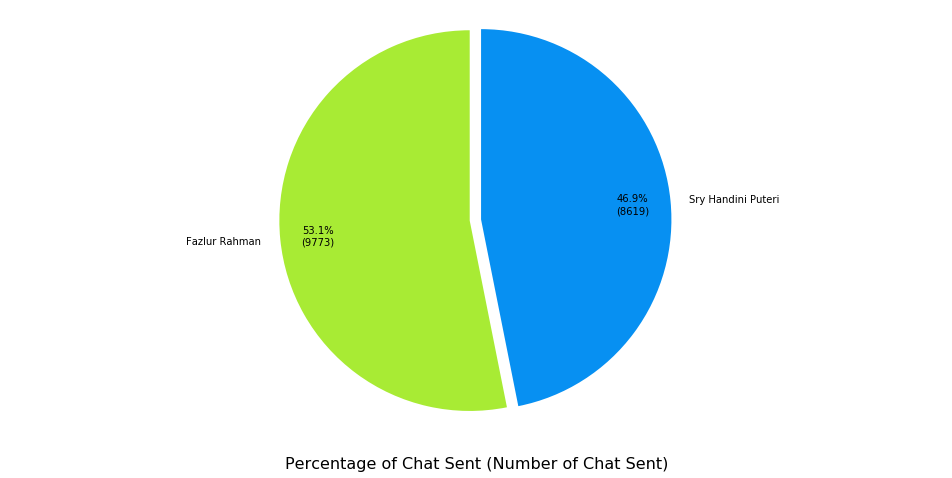

In [14]:
person1.printNbOfMessage()
person2.printNbOfMessage()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = person1.name, person2.name
sizes = [person1.nb_chat_sent, person2.nb_chat_sent]
explode = (0.05, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['#a8eb34', '#0790f2']

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
        shadow=False, startangle=90, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
plt.title('Percentage of Chat Sent (Number of Chat Sent)', fontsize=16, y = -0.1)
ax1.axis('equal')
plt.tight_layout()
plt.show()

## Plot Average Message Sent

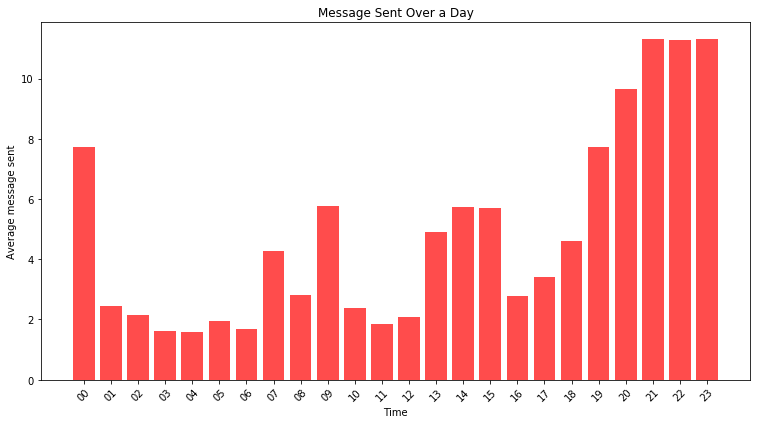

In [9]:
fig, ax = plt.subplots()
ax.bar(x_pos, average_by_hour, color ='r', alpha = 0.7)
plt.xticks(x_pos, hours, rotation=45)
plt.ylabel('Average message sent')
plt.xlabel('Time')
plt.title('Message Sent Over a Day')
plt.gcf().set_size_inches(w=16/1.5,h=9/1.5)
plt.tight_layout()
plt.show()

## Frequently Used Word

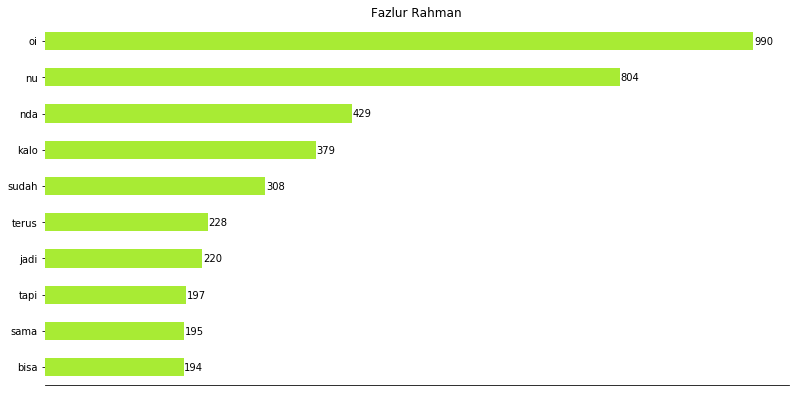

In [78]:
for i in range(10):
    person1.key_words[person1.dictionary[9-i][0]] = person1.dictionary[9-i][1]
    person2.key_words[person2.dictionary[9-i][0]] = person2.dictionary[9-i][1]
    
df = pd.DataFrame({'keys': list(person1.key_words.keys()), 'values': list(person1.key_words.values())})
ax = df.plot.barh(x='keys', y='values', color = colors[0], legend=False, title=person1.name)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

y_axis = ax.axes.get_yaxis()
y_label = y_axis.get_label()
##print isinstance(x_label, matplotlib.artist.Artist)
y_label.set_visible(False)

#ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
ax.set_axisbelow(True)
plt.savefig('filename.png', dpi=300)

for i in range(10):
    key = list(person1.key_words.keys())[i]
    xpos = person1.key_words[key]
    
    ax.text(xpos + 1, i-0.1, str(xpos), color='black')

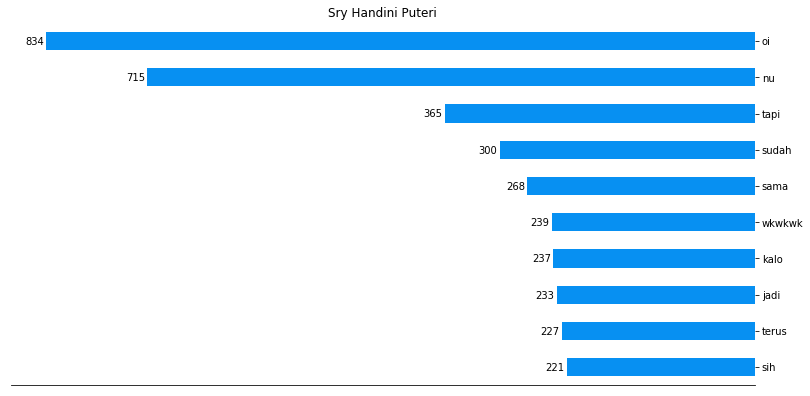

In [87]:
df = pd.DataFrame({'keys': list(person2.key_words.keys()), 'values': list(person2.key_words.values())})
ax = df.plot.barh(x='keys', y='values', color = colors[1], legend=False, title=person2.name)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

y_axis = ax.axes.get_yaxis()
y_label = y_axis.get_label()
##print isinstance(x_label, matplotlib.artist.Artist)
y_label.set_visible(False)

#ax.get_legend().remove()
ax.invert_xaxis()  # labels read top-to-bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position("right")

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
ax.set_axisbelow(True)
plt.savefig('filename.png', dpi=300)

for i in range(10):
    key = list(person2.key_words.keys())[i]
    xpos = person2.key_words[key]
    
    ax.text(xpos + 25, i-0.1, str(xpos), color='black')

In [12]:
from jdcal import gcal2jd, jd2gcal

yesterday_gcal = 0
today_gcal = 0
counter = 0
for date in dict_nb_of_chat_per_day.keys():
    counter += 1
    today_gcal = date
    today_gcal = date
    
    month, day, year = date.split("/")
    today_gcal = gcal2jd(year, month, day)
    
    if(today_gcal[1] - yesterday_gcal == 1):
        print(date + ", index: " + str(counter))
    
    yesterday_gcal = today_gcal[1]
    
    

1/2/20, index: 2
1/3/20, index: 3
1/4/20, index: 4
1/5/20, index: 5
1/6/20, index: 6
1/7/20, index: 7
1/8/20, index: 8
1/9/20, index: 9
1/10/20, index: 10
1/11/20, index: 11
1/12/20, index: 12
1/13/20, index: 13
1/14/20, index: 14
1/15/20, index: 15
1/16/20, index: 16
1/17/20, index: 17
1/18/20, index: 18
1/19/20, index: 19
1/20/20, index: 20
1/21/20, index: 21
1/22/20, index: 22
1/23/20, index: 23
1/24/20, index: 24
1/25/20, index: 25
1/26/20, index: 26
1/27/20, index: 27
1/28/20, index: 28
1/29/20, index: 29
1/30/20, index: 30
1/31/20, index: 31
2/1/20, index: 32
2/2/20, index: 33
2/3/20, index: 34
2/4/20, index: 35
2/5/20, index: 36
2/6/20, index: 37
2/7/20, index: 38
2/8/20, index: 39
2/9/20, index: 40
2/10/20, index: 41
2/11/20, index: 42
2/12/20, index: 43
2/13/20, index: 44
2/14/20, index: 45
2/15/20, index: 46
2/16/20, index: 47
2/17/20, index: 48
2/18/20, index: 49
2/19/20, index: 50
2/20/20, index: 51
2/21/20, index: 52
2/22/20, index: 53
2/23/20, index: 54
2/24/20, index: 55